In [ ]:
pip install soccerdata

In [ ]:
import soccerdata as sd

In [ ]:
# create scraper class instance of FBref
fbref = sd.FBref(leagues="ESP-La Liga", seasons='23-24')
print(fbref.__doc__)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
def get_xG(team):
    # create dataframes for reading the schedule
    epl_schedule = fbref.read_schedule()

    # filtering the DataFrame to include only rows with dates before '2023-10-28'
    filtered_schedule_team = epl_schedule[epl_schedule['date'] < '2023-10-28']

    # further filtering to include only rows where the specified team is either the home team or away team
    team_schedule = filtered_schedule_team[(filtered_schedule_team['home_team'] == team) | (filtered_schedule_team['away_team'] == team)]

    # sorting the filtered schedule by date
    sorted_team_schedule = team_schedule.sort_values(by='date')

    # create an empty list to store xG values of team
    xG_values_team = []

    # extract xG values regardless of whether the team is playing home or away
    for index, row in sorted_team_schedule.iterrows():
        if row['home_team'] == team:
            xG_values_team.append(row['home_xg'])
        elif row['away_team'] == team:
           xG_values_team.append(row['away_xg'])

    # create an empty list to store xG values of opponent team
    opponent_xG_values_team = {}

    # extract xG values of opponent team regardless of whether the team is playing home or away
    for index, row in sorted_team_schedule.iterrows():
        if row['home_team'] != team:
            opponent_team = row['home_team']
            xG_value_opponent = row['home_xg']
        elif row['away_team'] != team:
            opponent_team = row['away_team']
            xG_value_opponent = row['away_xg']
        opponent_xG_values_team[opponent_team] = xG_value_opponent

    # create a plot with specified size
    plt.figure(figsize=(15, 7))

    # create bar plots for both teams
    bars1 = plt.bar(range(1, len(xG_values_team) + 1), xG_values_team, color='orange')
    bars2 = plt.bar(range(1, len(opponent_xG_values_team) + 1), [-x for x in opponent_xG_values_team.values()], color='blue')

    # set labels for axes
    plt.xlabel('Match')
    plt.ylabel('xG')

    # add a horizontal line at y=0
    plt.axhline(0, color='black', linewidth=0.8)

    # add name of team on each bar
    for i, bar in enumerate(bars1):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.03, team, ha='center', va='bottom')

    # add team's name below the bars of the opponent team
    for i, bar in enumerate(bars2):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.03, list(opponent_xG_values_team.keys())[i], ha='center', va='top')

    # format y-axis labels to show absolute values
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '{}'.format(abs(int(x)))))

    # set x-axis ticks for all integers from 1 to 10
    plt.xticks(range(1, 11))

    # display the plot
    plt.show()

    # calculate xG and xGA for the team
    total_xG_team = sum(xG_values_team)
    total_xGA= sum(opponent_xG_values_team.values())

    return total_xG_team, total_xGA

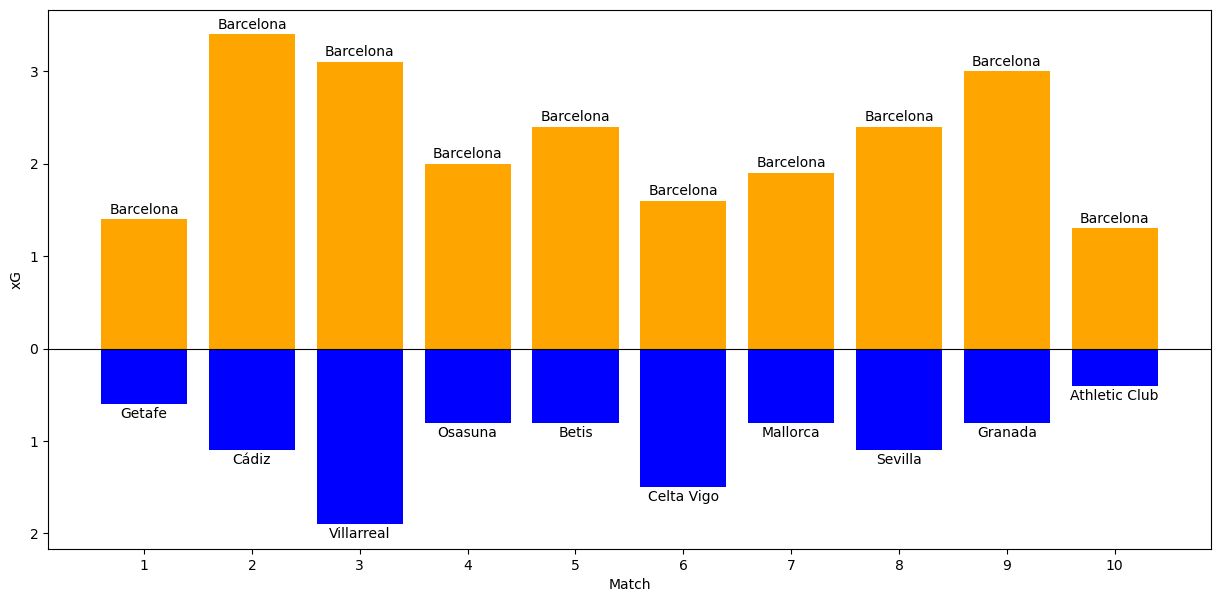

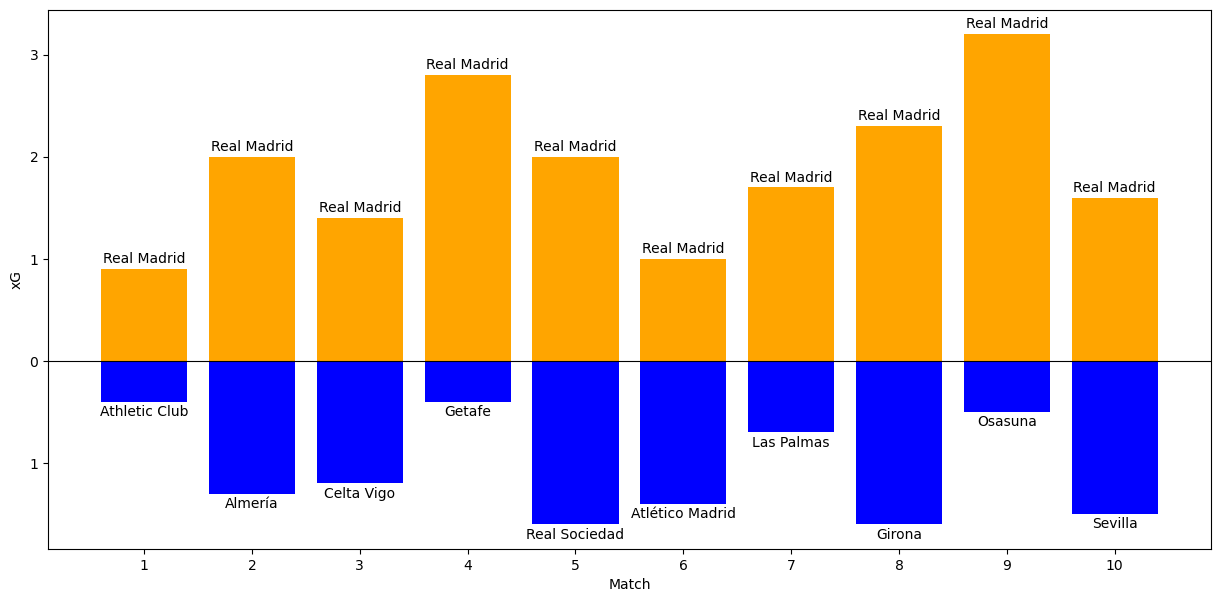

In [6]:
team = ['Barcelona', 'Real Madrid']

# store dictionaries containing team data
data_dict = {}

# loop through each team to get xG and xGA
for team_name in team:
    # call function to get xG and xGA for the current team
    xG, xGA = get_xG(team_name)

    # round xG and xGA to two decimal places
    xG = round(xG, 2)
    xGA = round(xGA, 2)

    data_dict[team_name] = {'xG': xG, 'xGA': xGA}



In [7]:
index_labels = list(data_dict.keys())  # extracting keys as index labels
data_dict_values = [list(data_dict[key].values()) for key in data_dict.keys()]  # extracting values as data_dict_values
df = pd.DataFrame(data_dict_values, index=index_labels, columns=list(data_dict[index_labels[0]].keys())) # creating DataFrame using extracted values and keys

# converting the 'xG' and 'xGA' columns to strings with two decimal places
df['xG'] = df['xG'].apply(lambda x: "{:.2f}".format(x))
df['xGA'] = df['xGA'].apply(lambda x: "{:.2f}".format(x))

# creating a style settings for table
styles = [
    # style for column headers
    dict(selector="th", props=[("border", "1px solid black"), ("text-align", "center"), ("background-color", "lightblue"), ("color", "black"), ("padding", "20px")]),
    # style for all other cells
    dict(selector="td", props=[("border", "1px solid black"), ("text-align", "center"), ("background-color", "white"), ("color", "black"), ("padding", "20px")]),
]

# applying styles to the DataFrame
styled_df = df.style.set_table_styles(styles)

# displaying the stylized DataFrame
styled_df


,xG,xGA
Barcelona,22.50,9.80
Real Madrid,18.90,10.60
